In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import os
import copy
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [2]:
dataset_dir = ["D:\\yolo\\YOLO\\dataset\\images", "D:\\yolo\\YOLO\\dataset\\labels"]
training_images = len(os.listdir(dataset_dir[0]))
training_images

43223

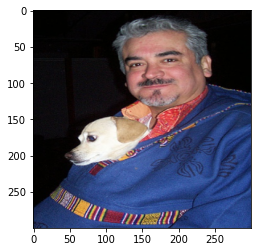

In [60]:
transformation = transforms.Compose([
    transforms.PILToTensor(),
	transforms.Resize(size=(300, 300))])
random_image = transformation(Image.open(os.path.join(dataset_dir[0], os.listdir(dataset_dir[0])[0])))
plt.imshow(random_image.permute(1, 2, 0).numpy())

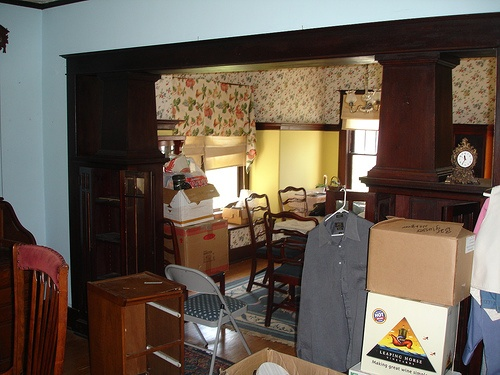

In [61]:
Image.open(os.path.join(dataset_dir[0], "000005.jpg"))

In [62]:
csv_file = os.path.join("D:\\yolo\\YOLO\\dataset\\", "train.csv")
i = 0
with open(csv_file, 'r') as f:
    train_set = f.readlines()
    images = [os.path.join(dataset_dir[0], img.split(',')[0]) for img in train_set]
    labels = [os.path.join(dataset_dir[1], img.split(',')[1].replace('\n', '')) for img in train_set]
with open (labels[0], 'r') as f:
    print(f.read())

8 0.587 0.7333333333333333 0.122 0.3413333333333333
8 0.418 0.848 0.176 0.288
8 0.536 0.6573333333333333 0.108 0.27999999999999997



In [76]:
from typing import Tuple, List
class VoCdataset(Dataset):
    def __init__(self,
                dataset_dir,
                transform,
                csv_file = None):
        
        super().__init__()
        
        self.dataset_dir = dataset_dir
        
        with open(csv_file, 'r') as f:
            train_set = f.readlines()
            self.images = [os.path.join(dataset_dir[0], img.split(',')[0]) for img in train_set]
            self.labels = [os.path.join(dataset_dir[1], img.split(',')[1].replace('\n', '')) for img in train_set]
            
            
        self.transform = transform
        #self.images = [self.transform(Image.open(x)) for x in self.images]

        
    def __getitem__(self, x) -> Tuple[torch.Tensor, List[str]]:
        """
        Returns a tuple of (image tensor, label [list])
        """
        image = Image.open(self.images[x])
        
        with open(self.labels[x], 'r') as f:
            label = f.readlines()
        
        return (self.transform(image), label)
    
    def __len__(self) -> int:
        return len(self.images)

In [77]:
csv_file = os.path.join("D:\\yolo\\YOLO\\dataset\\", "train.csv")
test_obj = VoCdataset(dataset_dir, transformation, csv_file)

In [78]:
len(test_obj.images), len(test_obj.labels)

(16551, 16551)

In [84]:
test_obj[0][0].shape, test_obj[100][0].shape
test_obj[0][1], test_obj[100][1]

(['8 0.587 0.7333333333333333 0.122 0.3413333333333333\n',
  '8 0.418 0.848 0.176 0.288\n',
  '8 0.536 0.6573333333333333 0.108 0.27999999999999997\n'],
 ['1 0.502 0.503003003003003 0.992 0.9819819819819819\n'])

2 ['8 0.587 0.7333333333333333 0.122 0.3413333333333333\n', '8 0.418 0.848 0.176 0.288\n', '8 0.536 0.6573333333333333 0.108 0.27999999999999997\n']


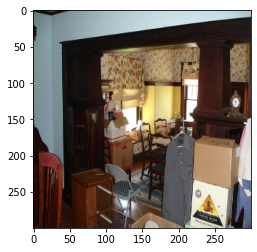

In [85]:
print(len(test_obj[0]), test_obj[0][1]);
plt.imshow(test_obj[0][0].permute(1, 2, 0).numpy());

In [88]:

## The images are irregular meaning they are not of fixed shape so 
## when you are trying to batchify them say batch_size = some other value > 1
## there there will be error
train_dataloader = DataLoader(test_obj,
                             batch_size=1,
                              shuffle=True)

In [89]:
img, label = next(iter(train_dataloader))